In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../data/processed/data_prefinal.csv")
df

,MARITAL,RENTHOM1,VETERAN3,EMPLOY1,_AGEG5YR,_INCOMG1,_EDUCAG,_CHLDCNT,HHADULT,SEXVAR,...,_DRDXAR2,_PHYS14D,_MENT14D,_BMI5CAT,DECIDE,DIFFALON,LSATISFY,EMTSUPRT,SDHISOLT,tobacco_use
0,1.0,1.0,2.0,1.0,9.0,5.0,4.0,1.0,2.0,2.0,...,2.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0
1,1.0,1.0,2.0,7.0,9.0,9.0,4.0,1.0,4.0,2.0,...,2.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0,0.0
2,1.0,2.0,2.0,1.0,7.0,3.0,2.0,1.0,2.0,2.0,...,1.0,1.0,1.0,4.0,2.0,2.0,1.0,1.0,0.0,0.0
3,1.0,1.0,2.0,1.0,7.0,6.0,3.0,1.0,2.0,1.0,...,2.0,1.0,1.0,4.0,2.0,2.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1.0,8.0,9.0,4.0,3.0,1.0,2.0,1.0,...,2.0,1.0,1.0,4.0,2.0,2.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115289,2.0,1.0,2.0,2.0,9.0,6.0,3.0,1.0,1.0,1.0,...,1.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0
115290,1.0,2.0,2.0,1.0,10.0,6.0,4.0,1.0,4.0,1.0,...,1.0,1.0,3.0,3.0,2.0,2.0,2.0,1.0,0.0,0.0
115291,1.0,1.0,1.0,1.0,7.0,5.0,4.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,0.0,0.0
115292,1.0,3.0,2.0,8.0,10.0,9.0,2.0,1.0,1.0,2.0,...,2.0,3.0,3.0,1.0,7.0,2.0,9.0,0.0,1.0,2.0


In [3]:
from scipy.stats import chi2_contingency

def cramers_v(var1, var2, df):
    """
    Calcula Cramér's V entre dos variables categóricas.
    
    Parámetros:
    - var1: str, nombre de la primera columna
    - var2: str, nombre de la segunda columna
    - df: DataFrame que contiene las variables
    
    Retorna:
    - float: valor de Cramér's V
    """
    tabla = pd.crosstab(df[var1], df[var2])
    chi2, _, _, _ = chi2_contingency(tabla)
    n = tabla.sum().sum()
    k = min(tabla.shape)
    return np.sqrt(chi2 / (n * (k - 1)))


In [4]:
# Variable: SDHEMPLY
# ¿En los últimos 12 meses ha perdido su empleo o le han reducido sus horas de trabajo?
# Cambio de codificacion:
# 1: si     0: no       -1: no contesta
print(df["SDHEMPLY"].value_counts())
df.loc[df["SDHEMPLY"] > 2, "SDHEMPLY"] = -1
df.loc[df["SDHEMPLY"] == 2, "SDHEMPLY"] = 0
print(df["SDHEMPLY"].value_counts())

SDHEMPLY
2.0    105536
1.0      8807
7.0       488
9.0       463
Name: count, dtype: int64
SDHEMPLY
 0.0    105536
 1.0      8807
-1.0       951
Name: count, dtype: int64


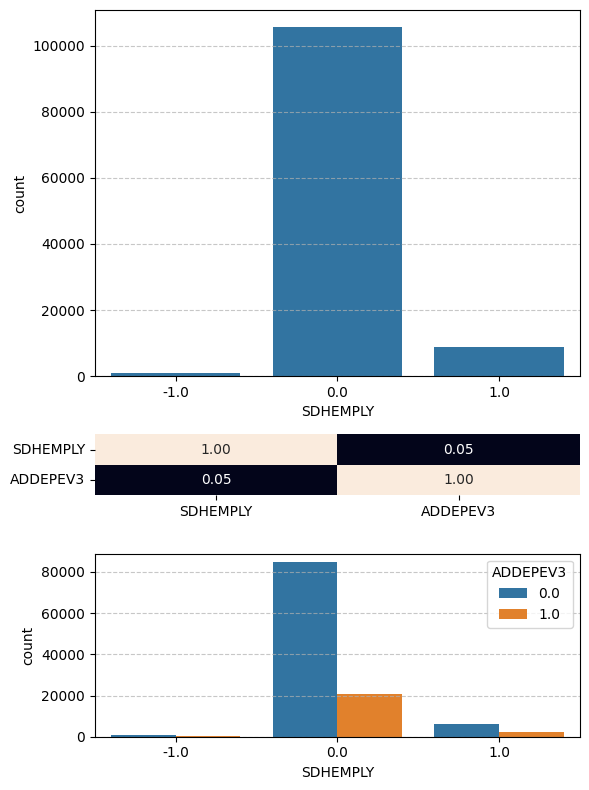

In [5]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "SDHEMPLY")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "SDHEMPLY")
sns.heatmap(df[["SDHEMPLY", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "SDHEMPLY", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [6]:
v = cramers_v("SDHEMPLY", "ADDEPEV3", df)
print(f"Cramér's V: {v:.4f}")

Cramér's V: 0.0588


📌 SDHEMPLY – ¿Ha estado sin trabajo en los últimos 12 meses?
Codificación personalizada:

- 1: Sí
- 0: No
- -1: No contesta (sin nulos tras limpieza)

🧾 Descripción:
- Esta variable recoge si la persona ha estado desempleada durante el último año. Es un buen indicador del contexto económico y social del encuestado.

📊 Distribución general (countplot):
- La gran mayoría respondió que no ha estado sin trabajo (0).
- Una minoría declaró haber estado desempleado (1).
- Muy pocos no contestaron (-1), tras eliminar los nulos.

🧠 Relación con la salud mental (ADDEPEV3):
- Entre quienes sí estuvieron desempleados, se observa una mayor proporción de personas con diagnóstico de depresión.
- En quienes no estuvieron desempleados, la proporción es menor.
- Esta diferencia, aunque visualmente clara, no es fuerte en términos estadísticos.

📐 Cramér's V: 0.0588
- Valor muy bajo, indica correlación débil.
- A pesar de su baja magnitud, refleja una tendencia esperable: el desempleo puede estar asociado con mayor vulnerabilidad emocional.

In [7]:
# Variable: SDHFOOD1
# Durante los últimos 12 meses, ¿con qué frecuencia no te duró la comida que compraste y no tuviste dinero para comprar más? ¿Fue eso…?
# Cambio de codificacion:
# -1: no contesta       [El resto se mantiene tal cual]
print(df["SDHFOOD1"].value_counts())
df.loc[df["SDHFOOD1"] > 5, "SDHFOOD1"] = -1
print(df["SDHFOOD1"].value_counts())

SDHFOOD1
5.0    95328
4.0     7917
3.0     7287
1.0     2255
2.0     1906
7.0      344
9.0      257
Name: count, dtype: int64
SDHFOOD1
 5.0    95328
 4.0     7917
 3.0     7287
 1.0     2255
 2.0     1906
-1.0      601
Name: count, dtype: int64


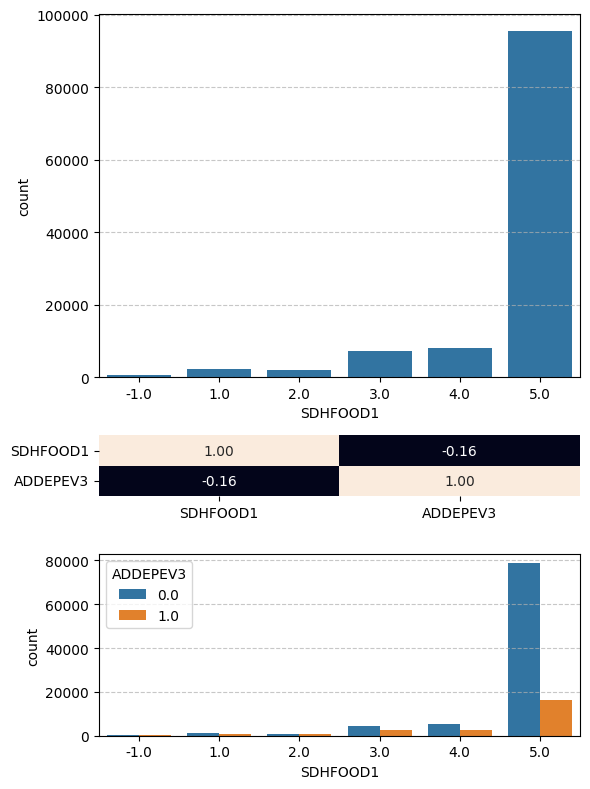

In [8]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "SDHFOOD1")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "SDHFOOD1")
sns.heatmap(df[["SDHFOOD1", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "SDHFOOD1", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [9]:
v = cramers_v("SDHFOOD1", "ADDEPEV3", df)
print(f"Cramér's V: {v:.4f}")

Cramér's V: 0.1855


📌 SDHFOOD1 – ¿Hubo veces en los últimos 12 meses en que no tuvo suficiente comida?
Codificación aplicada:
- 1: Siempre
- 2: Casi siempre
- 3: Algunas veces
- 4: Rara vez
- 5: Nunca
- -1: No contesta (sin nulos tras limpieza)

🧾 Descripción:
- Esta variable mide la inseguridad alimentaria del encuestado, preguntando si alguna vez en el último año se quedó sin suficiente comida por falta de dinero. Es un indicador fuerte de vulnerabilidad social y económica.

📊 Distribución general (countplot):
- La mayoría abrumadora respondió que nunca le faltó comida (5).
- Pocas personas reportaron haber pasado hambre con mayor frecuencia (1 a 4).
- Muy pocos no respondieron (-1).

🧠 Relación con la salud mental (ADDEPEV3):
- Se observa una clara tendencia: a medida que aumenta la frecuencia con la que faltó comida, también aumenta la proporción de personas con diagnóstico de depresión.
- Los valores más extremos (1 y 2) presentan una proporción visiblemente más alta de depresión respecto a quienes nunca pasaron hambre.

📐 Cramér's V: 0.1855
- Correlación moderada. Mucho más relevante que otras variables sociales.
- Refleja una relación coherente con la evidencia: la inseguridad alimentaria tiene impacto emocional y psicológico significativo.

In [10]:
# Variable: SDHUTILS
# Durante los últimos 12 meses, ¿hubo alguna ocasión en que una compañía de electricidad, gas, petróleo o agua amenazó 
# con cortar los servicios?
# Cambio de codificacion:
# 1: si     0: no       -1: no contesta
print(df["SDHUTILS"].value_counts())
df.loc[df["SDHUTILS"] > 2, "SDHUTILS"] = -1
df.loc[df["SDHUTILS"] == 2, "SDHUTILS"] = 0
print(df["SDHUTILS"].value_counts())

SDHUTILS
2.0    108538
1.0      6393
9.0       187
7.0       176
Name: count, dtype: int64
SDHUTILS
 0.0    108538
 1.0      6393
-1.0       363
Name: count, dtype: int64


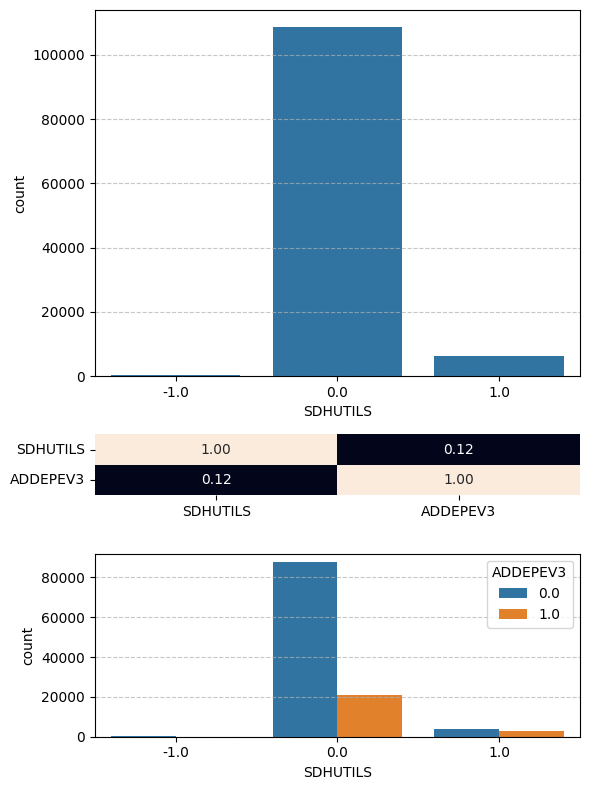

In [11]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "SDHUTILS")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "SDHUTILS")
sns.heatmap(df[["SDHUTILS", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "SDHUTILS", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [12]:
v = cramers_v("SDHUTILS", "ADDEPEV3", df)
print(f"Cramér's V: {v:.4f}")

Cramér's V: 0.1262


📌 SDHUTILS – ¿Tuvo dificultades para pagar los servicios básicos (agua, luz, gas) en los últimos 12 meses?
Codificación personalizada:
- 1: Sí
- 0: No
- -1: No contesta (sin nulos tras limpieza)

🧾 Descripción:
- Esta variable refleja si el encuestado experimentó problemas económicos para pagar facturas esenciales del hogar. Es un marcador relevante de precariedad económica.

📊 Distribución general (countplot):
- La gran mayoría de los encuestados no tuvo dificultades (0).
- Un grupo menor sí reportó problemas para cubrir estos gastos (1).
- Muy pocos no respondieron (-1), tras el tratamiento previo de nulos.

🧠 Relación con la salud mental (ADDEPEV3):
- Quienes sí tuvieron problemas para pagar los servicios presentan una proporción más alta de diagnóstico de depresión.
- En cambio, en el grupo sin problemas económicos, la incidencia de depresión es claramente menor.

📐 Cramér's V: 0.1262
- Correlación débil a moderada, pero superior al umbral típico de irrelevancia.
- Sugiere que las dificultades económicas básicas sí pueden tener impacto en la salud mental, lo cual concuerda con evidencia empírica.

In [13]:
# Variable: SDHBILLS
# Durante los últimos 12 meses, ¿hubo algún momento en el que no pudo pagar su hipoteca, alquiler o facturas de servicios públicos?
# Cambio de codificacion:
# 1: si     0: no       -1: no contesta
print(df["SDHBILLS"].value_counts())
df.loc[df["SDHBILLS"] > 2, "SDHBILLS"] = -1
df.loc[df["SDHBILLS"] == 2, "SDHBILLS"] = 0
print(df["SDHBILLS"].value_counts())

SDHBILLS
2.0    105420
1.0      9409
7.0       238
9.0       227
Name: count, dtype: int64
SDHBILLS
 0.0    105420
 1.0      9409
-1.0       465
Name: count, dtype: int64


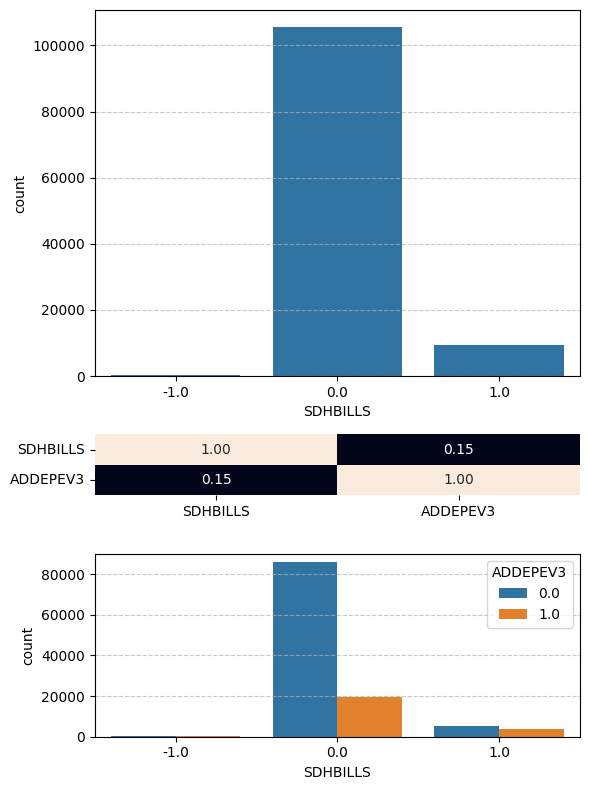

In [14]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "SDHBILLS")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "SDHBILLS")
sns.heatmap(df[["SDHBILLS", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "SDHBILLS", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [15]:
v = cramers_v("SDHBILLS", "ADDEPEV3", df)
print(f"Cramér's V: {v:.4f}")

Cramér's V: 0.1589


📌 SDHBILLS – ¿Tuvo dificultades para pagar facturas importantes (hipoteca, alquiler, etc.) en los últimos 12 meses?
Codificación personalizada:
- 1: Sí
- 0: No
- -1: No contesta (sin nulos tras limpieza)

🧾 Descripción:
- Esta variable identifica si el encuestado tuvo problemas para pagar gastos estructurales importantes, como el alquiler o la hipoteca. Es un indicador clave de estrés financiero severo.

📊 Distribución general (countplot):
- La mayoría respondió que no tuvo dificultades (0).
- Un grupo menor declaró haber enfrentado problemas para pagar estas facturas (1).
- Muy pocos no contestaron (-1), tras limpieza de datos.

🧠 Relación con la salud mental (ADDEPEV3):
- Quienes sí enfrentaron problemas para pagar el alquiler o hipoteca presentan una proporción más alta de depresión.
- La diferencia con respecto al grupo sin problemas económicos es notoria visualmente, lo que sugiere una posible relación causa-efecto o al menos una asociación significativa.

📐 Cramér's V: 0.1589
- Correlación débil-moderada, algo superior a SDHUTILS, y cerca del umbral de relevancia práctica.
- Refuerza la idea de que los problemas financieros serios están asociados con un mayor riesgo de depresión.

In [16]:
# Variable: SDHTRNSP
# Durante los últimos 12 meses, ¿la falta de transporte confiable le ha impedido asistir a citas médicas, reuniones, 
# trabajar o conseguir las cosas que necesita para la vida diaria?
# Cambio de codificacion:
# 1: si     0: no       -1: no contesta
print(df["SDHTRNSP"].value_counts())
df.loc[df["SDHTRNSP"] > 2, "SDHTRNSP"] = -1
df.loc[df["SDHTRNSP"] == 2, "SDHTRNSP"] = 0
print(df["SDHTRNSP"].value_counts())

SDHTRNSP
2.0    108478
1.0      6496
9.0       174
7.0       146
Name: count, dtype: int64
SDHTRNSP
 0.0    108478
 1.0      6496
-1.0       320
Name: count, dtype: int64


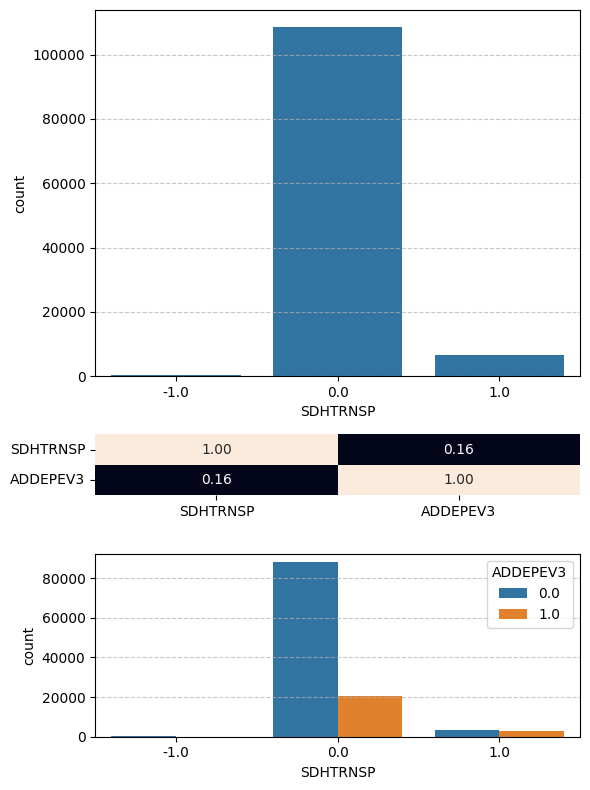

In [17]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "SDHTRNSP")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "SDHTRNSP")
sns.heatmap(df[["SDHTRNSP", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "SDHTRNSP", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [18]:
v = cramers_v("SDHTRNSP", "ADDEPEV3", df)
print(f"Cramér's V: {v:.4f}")

Cramér's V: 0.1682


📌 SDHTRNSP – ¿Tuvo dificultades para acceder al transporte en los últimos 12 meses?
Codificación personalizada:
- 1: Sí
- 0: No
- -1: No contesta (sin nulos tras limpieza)

🧾 Descripción:
- Esta variable indica si la persona tuvo problemas de acceso al transporte público o privado, lo que puede afectar su capacidad para trabajar, ir al médico o socializar. Es un indicador de barreras logísticas y exclusión social.

📊 Distribución general (countplot):
- La mayoría de los encuestados respondió que no tuvo dificultades (0).
- Una minoría indicó haber tenido problemas de transporte (1).
- Los que no contestaron (-1) representan un número muy reducido gracias al filtrado previo de nulos.

🧠 Relación con la salud mental (ADDEPEV3):
- Aquellos que sí tuvieron dificultades con el transporte muestran una mayor proporción de casos de depresión.
- El gráfico con la variable objetivo refuerza esta idea: hay una diferencia clara y consistente en la incidencia de depresión entre ambos grupos.

📐 Cramér's V: 0.1682
- Valor que indica una correlación débil-moderada, similar a la observada en otras variables relacionadas con carencias económicas o de servicios.
- Esto sugiere que la falta de acceso al transporte puede ser un factor estresante importante, con implicaciones en la salud mental.

In [19]:
# Variable: SLEPTIM1
# En promedio, ¿cuántas horas duermes en un período de 24 horas?
# Cambio de codificacion:
# -1: no contesta       [El resto se mantiene tal cual]
print(df["SLEPTIM1"].value_counts())
df.loc[df["SLEPTIM1"] > 24, "SLEPTIM1"] = -1
print(df["SLEPTIM1"].value_counts())

SLEPTIM1
7.0     35382
8.0     33326
6.0     23976
5.0      7275
9.0      5719
4.0      3166
10.0     2676
77.0      964
3.0       809
12.0      736
2.0       339
1.0       244
11.0      176
99.0      105
15.0       90
14.0       84
16.0       78
18.0       51
13.0       42
20.0       32
24.0       10
17.0        6
19.0        4
23.0        2
22.0        2
Name: count, dtype: int64
SLEPTIM1
 7.0     35382
 8.0     33326
 6.0     23976
 5.0      7275
 9.0      5719
 4.0      3166
 10.0     2676
-1.0      1069
 3.0       809
 12.0      736
 2.0       339
 1.0       244
 11.0      176
 15.0       90
 14.0       84
 16.0       78
 18.0       51
 13.0       42
 20.0       32
 24.0       10
 17.0        6
 19.0        4
 23.0        2
 22.0        2
Name: count, dtype: int64


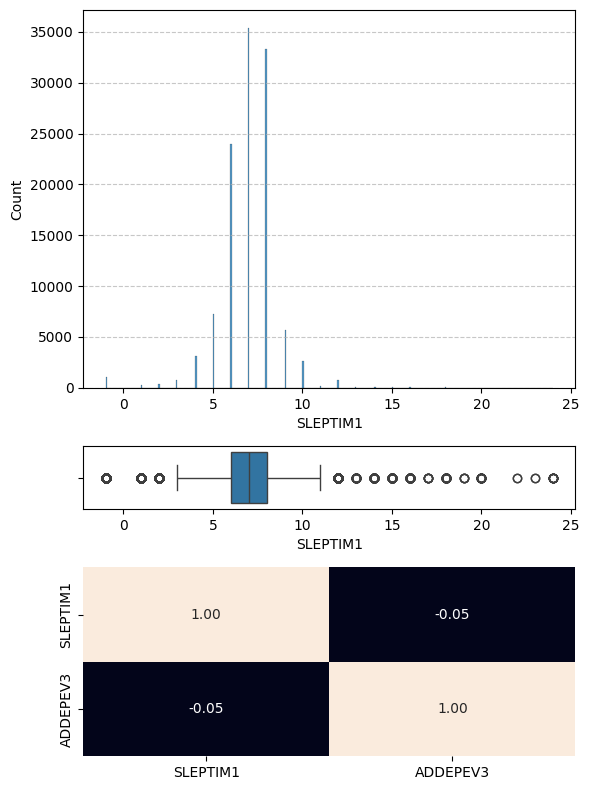

In [20]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.histplot(ax = axis[0], data = df, x = "SLEPTIM1")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
sns.boxplot(ax = axis[1], data = df, x = "SLEPTIM1")
sns.heatmap(df[["SLEPTIM1", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[2], cbar = False)

plt.tight_layout()
plt.show()

💤 SLEPTIM1 – Promedio de horas de sueño en 24 horas
Codificación personalizada:
- Valores entre 1 y 24: Número de horas de sueño
- -1: No contesta (ya eliminado en la limpieza)

🧾 Descripción:
- Esta variable refleja cuántas horas duerme normalmente el encuestado en un período de 24 horas. Es un indicador directo de hábitos de descanso, estrechamente relacionados con la salud física y mental.

📊 Distribución general (histograma):
- La mayoría de los encuestados duermen entre 6 y 8 horas, con picos marcados en 6, 7 y 8.
- Hay valores extremos (outliers), con personas que reportan dormir menos de 3 horas o más de 12, aunque son casos muy poco frecuentes.

📦 Boxplot:
- La mediana de sueño está en torno a 7 horas.
- Se observan outliers tanto por debajo como por encima del rango típico, que podrían representar condiciones especiales de salud o estilo de vida.

🧠 Relación con la salud mental (ADDEPEV3):
- El coeficiente de correlación de Pearson es -0.05, indicando una relación muy débil y negativa: a menor cantidad de sueño, hay una ligera mayor probabilidad de depresión.
- Aunque débil, la relación es coherente con la literatura científica, que asocia la privación del sueño con trastornos del estado de ánimo.

📌 Conclusión:
- Aunque la correlación es baja, la falta de sueño podría actuar como un factor de riesgo secundario, especialmente si se combina con otras variables de vulnerabilidad social.

In [21]:
# Variable: HIVRISK5
# Voy a leerte una lista. Cuando termine, por favor, dime si alguna de estas situaciones te aplica. No es necesario 
# que me digas cuál. Te has inyectado alguna droga distinta a la recetada en el último año. Has recibido tratamiento 
# por una enfermedad de transmisión sexual o ETS en el último año. Has dado o recibido dinero o drogas a cambio de sexo en el último año.
# Cambio de codificacion:
# 1: si     0: no       -1: no contesta
print(df["HIVRISK5"].value_counts())
df.loc[df["HIVRISK5"] > 2, "HIVRISK5"] = -1
df.loc[df["HIVRISK5"] == 2, "HIVRISK5"] = 0
print(df["HIVRISK5"].value_counts())

HIVRISK5
2.0    112171
1.0      2660
9.0       362
7.0       101
Name: count, dtype: int64
HIVRISK5
 0.0    112171
 1.0      2660
-1.0       463
Name: count, dtype: int64


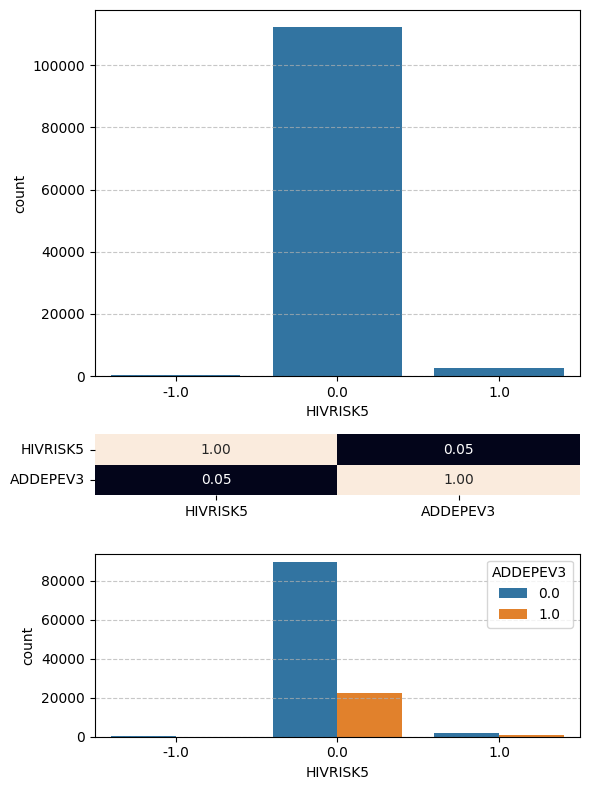

In [22]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "HIVRISK5")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "HIVRISK5")
sns.heatmap(df[["HIVRISK5", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "HIVRISK5", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [23]:
v = cramers_v("HIVRISK5", "ADDEPEV3", df)
print(f"Cramér's V: {v:.4f}")

Cramér's V: 0.0558


📌 HIVRISK5 – ¿Considera que sus actividades lo ponen en riesgo de contraer VIH?
Codificación personalizada:
- 1: Sí
- 0: No
- -1: No contesta (sin nulos tras limpieza)

🧾 Descripción:
- Esta variable recoge si la persona percibe riesgo personal de contraer VIH por sus actividades. Aunque no mide conductas específicas, sí refleja una percepción de vulnerabilidad en el ámbito sexual o de salud.

📊 Distribución general (countplot):
- Una gran mayoría respondió que no se percibe en riesgo (0).
- Solo una pequeña proporción indicó que sí considera estar en riesgo (1).
- El grupo de no respuesta (-1) fue eliminado en el preprocesamiento.

🧠 Relación con la salud mental (ADDEPEV3):
- Entre quienes sí se perciben en riesgo de VIH, hay una ligeramente mayor proporción de depresión.
- El countplot desglosado por la variable objetivo muestra esta diferencia visualmente, aunque no es muy pronunciada.

📐 Cramér's V: 0.0558
- Correlación muy débil, apenas por encima del umbral de irrelevancia.
- Puede reflejar que las personas con conductas de riesgo o percepciones negativas sobre su salud sexual también podrían experimentar más estrés o vulnerabilidad emocional, pero no es un factor fuerte por sí solo.

In [24]:
# Variable: _TOTINDA
# Adultos que informaron haber realizado actividad física o ejercicio durante los últimos 30 días aparte de su trabajo habitual
# Cambio de codificacion:
# 1: si     0: no       -1: no contesta
print(df["_TOTINDA"].value_counts())
df.loc[df["_TOTINDA"] > 2, "_TOTINDA"] = -1
df.loc[df["_TOTINDA"] == 2, "_TOTINDA"] = 0
print(df["_TOTINDA"].value_counts())

_TOTINDA
1.0    87409
2.0    27668
9.0      217
Name: count, dtype: int64
_TOTINDA
 1.0    87409
 0.0    27668
-1.0      217
Name: count, dtype: int64


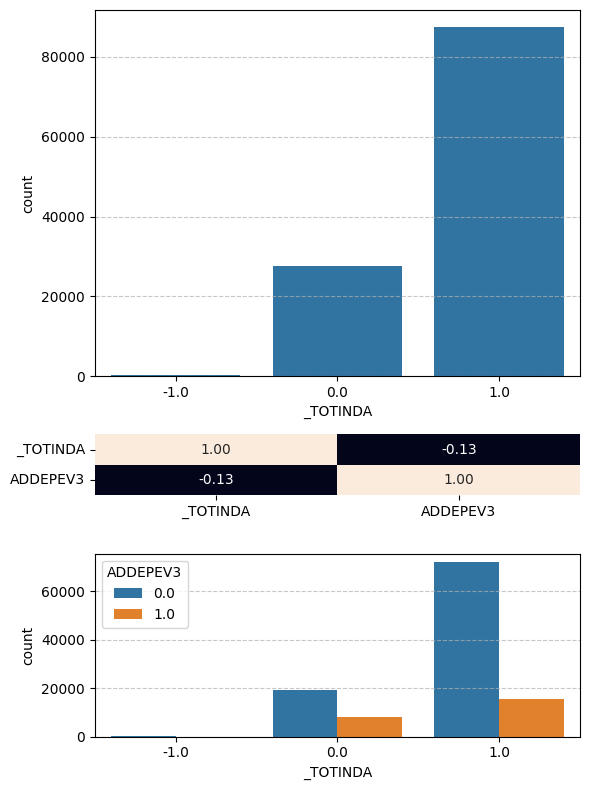

In [25]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "_TOTINDA")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "_TOTINDA")
sns.heatmap(df[["_TOTINDA", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "_TOTINDA", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [26]:
v = cramers_v("_TOTINDA", "ADDEPEV3", df)
print(f"Cramér's V: {v:.4f}")

Cramér's V: 0.1271


📌 _TOTINDA – ¿Realiza algún tipo de actividad física?
Codificación personalizada:
- 1: Sí (realiza al menos actividad física moderada)
- 0: No
- -1: No contesta (ya eliminado)

🧾 Descripción:
- Esta variable refleja si la persona realiza alguna actividad física en su tiempo libre, ya sea de forma leve, moderada o vigorosa. Es un indicador muy usado en estudios sobre hábitos saludables y salud mental.

📊 Distribución general (countplot):
- La mayoría de los encuestados respondió sí (1), lo que sugiere que una gran parte de la muestra está mínimamente activa.
- Un grupo menor no realiza actividad física (0), y el grupo sin respuesta (-1) ha sido eliminado.

🧠 Relación con la salud mental (ADDEPEV3):
- Entre quienes no hacen ejercicio, se observa una proporción más alta de casos de depresión.
- Por el contrario, las personas que sí se mantienen activas presentan menor prevalencia de depresión.
- Este patrón es coherente con muchos estudios que destacan la actividad física como factor protector frente a trastornos mentales.

📐 Cramér's V: 0.1271
- La correlación es débil a moderada, pero significativa.
- Refuerza la hipótesis de que el ejercicio regular podría tener un efecto positivo en el estado de ánimo y bienestar mental.

In [27]:
# Variable: _RFBING6
# Bebedores compulsivos (hombres que beben cinco o más bebidas en una ocasión, mujeres que beben cuatro o más bebidas en una ocasión)
# YA ESTA CODIFICADA CORRECTAMENTE

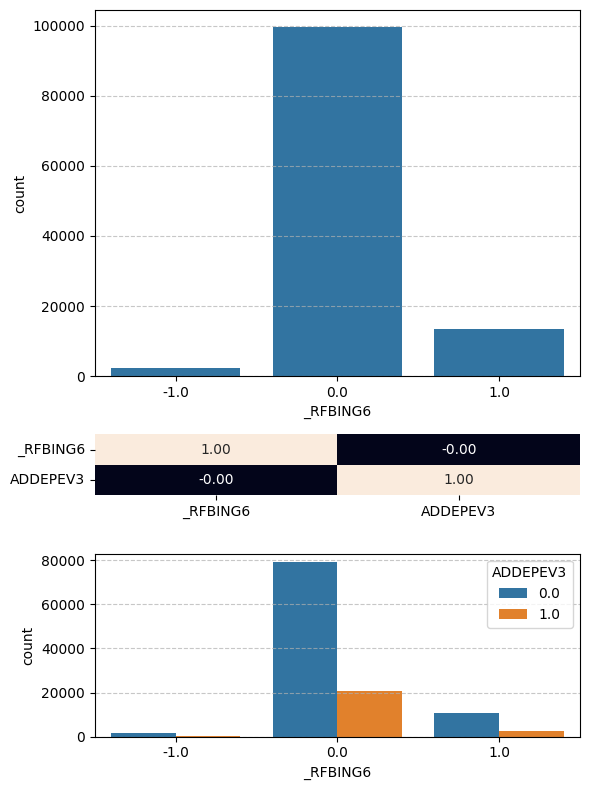

In [28]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "_RFBING6")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "_RFBING6")
sns.heatmap(df[["_RFBING6", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "_RFBING6", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [29]:
v = cramers_v("_RFBING6", "ADDEPEV3", df)
print(f"Cramér's V: {v:.4f}")

Cramér's V: 0.0067


📌 _RFBING6 – ¿Es bebedor/a compulsivo/a? (binge drinking)
Codificación personalizada:
- 1: Sí
- 0: No
- -1: No contesta (ya eliminado en la limpieza)

🧾 Descripción:
- Esta variable clasifica si el encuestado incurre en episodios de consumo excesivo de alcohol. En EE.UU., esto suele definirse como 5 o más bebidas para hombres o 4 o más para mujeres en una sola ocasión. Es un indicador de riesgo de salud y posible autodescuido.

📊 Distribución general (countplot):
- La gran mayoría de los encuestados no es bebedor compulsivo (0).
- Un grupo menor sí presenta este comportamiento (1).
- Los no respondientes (-1) fueron eliminados en el procesamiento previo.

🧠 Relación con la salud mental (ADDEPEV3):
- Visualmente, hay ligera mayor proporción de casos de depresión entre los que no presentan binge drinking que entre quienes sí.
- Esto podría parecer contraintuitivo, pero puede deberse a factores de percepción, edad o subgrupos específicos.
- En cualquier caso, la diferencia es muy pequeña.

📐 Cramér's V: 0.0067
- Valor extremadamente bajo, que indica ausencia práctica de correlación entre el consumo compulsivo de alcohol y el diagnóstico de depresión en este conjunto de datos.
- Aunque el alcohol se asocia con problemas de salud mental en otros estudios, en esta muestra no se refleja como un factor diferenciador claro.

In [30]:
# Variable: CVDSTRK3
# ¿Alguna vez te han dicho que tuviste un derrame cerebral?
# Cambio de codificacion:
# 1: si     0: no       -1: no contesta
print(df["CVDSTRK3"].value_counts())
df.loc[df["CVDSTRK3"] > 2, "CVDSTRK3"] = -1
df.loc[df["CVDSTRK3"] == 2, "CVDSTRK3"] = 0
print(df["CVDSTRK3"].value_counts())

CVDSTRK3
2.0    109185
1.0      5846
7.0       257
9.0         6
Name: count, dtype: int64
CVDSTRK3
 0.0    109185
 1.0      5846
-1.0       263
Name: count, dtype: int64


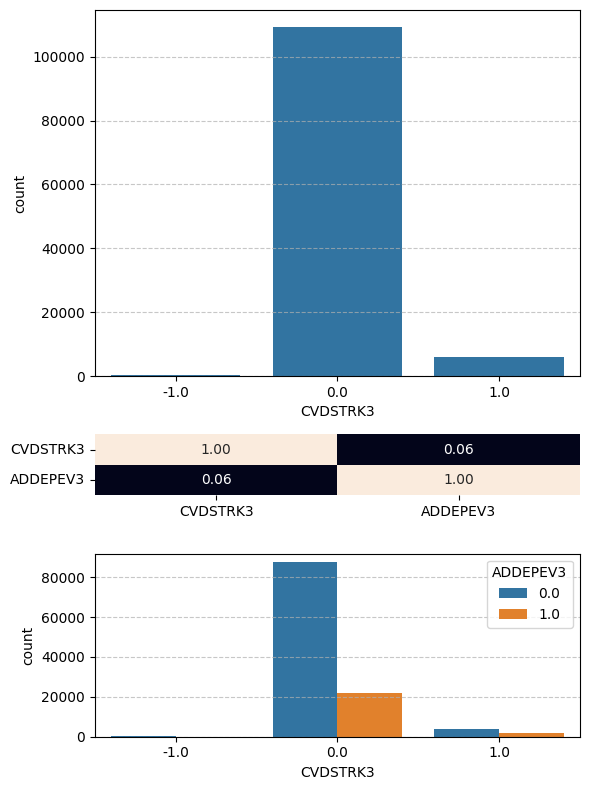

In [31]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "CVDSTRK3")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "CVDSTRK3")
sns.heatmap(df[["CVDSTRK3", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "CVDSTRK3", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [32]:
v = cramers_v("CVDSTRK3", "ADDEPEV3", df)
print(f"Cramér's V: {v:.4f}")

Cramér's V: 0.0650


📌 CVDSTRK3 – ¿Ha sufrido alguna vez un derrame cerebral (stroke)?
Codificación personalizada:
- 1: Sí
- 0: No
- -1: No contesta (ya eliminado del dataset)

🧾 Descripción:
- Esta variable indica si el encuestado ha sido diagnosticado alguna vez con un accidente cerebrovascular (ACV), también conocido como "stroke". Es un evento médico grave con consecuencias físicas y cognitivas que pueden impactar notablemente en la calidad de vida.

📊 Distribución general (countplot):
- La gran mayoría de los participantes no ha sufrido un ACV (0).
- Una minoría significativa sí ha tenido un derrame cerebral (1).
- Los que no respondieron (-1) ya fueron depurados.

🧠 Relación con la salud mental (ADDEPEV3):
- El gráfico revela que las personas que han sufrido un ACV presentan una mayor proporción de diagnóstico de depresión.
- Esto es esperable, dado el impacto que puede tener un ACV en la funcionalidad diaria, la independencia y el estado emocional.

📐 Cramér's V: 0.0650
- Correlación débil, pero ligeramente superior al umbral de irrelevancia.
- Refleja una tendencia consistente con la literatura médica, que asocia enfermedades crónicas o incapacitantes con mayor riesgo de depresión.



In [33]:
# Variable: ADDEPEV3 [OBJETIVO]
# ¿Alguna vez te dijeron que tenías un trastorno depresivo (incluyendo depresión, depresión mayor, distimia o depresión menor)?
# YA ESTA CODIFICADA CORRECTAMENTE

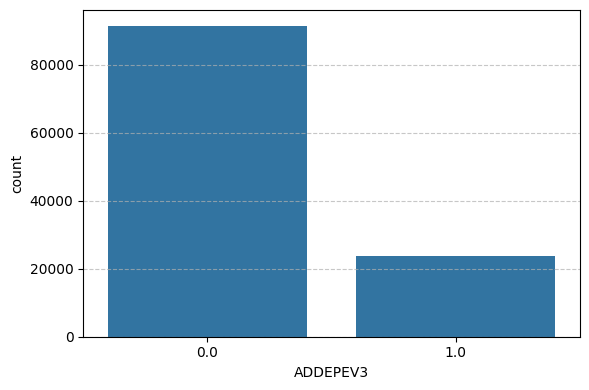

In [34]:
fig, axis = plt.subplots(figsize = (6, 4))

sns.countplot(data = df, x = "ADDEPEV3")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

🎯 ADDEPEV3 – ¿Ha sido diagnosticado con depresión alguna vez?
Codificación personalizada:
- 1: Sí
- 0: No
- -1: No contesta (ya eliminado del dataset)

🧾 Descripción:
- Esta variable representa la variable objetivo del análisis, indicando si el encuestado ha sido diagnosticado por un profesional de salud con depresión clínica en algún momento de su vida. Es un indicador directo de salud mental y permite estudiar factores asociados a este diagnóstico.

📊 Distribución general:
- La mayoría de los encuestados no ha sido diagnosticada con depresión (0): aproximadamente el 79%.
- Un 21% respondió afirmativamente (1), indicando haber recibido un diagnóstico.
- Esto nos deja con un dataset moderadamente desbalanceado, aunque aún viable para clasificación sin técnicas agresivas de balanceo.

📌 Recomendaciones:
- Considerar usar métricas como F1-score, recall y precisión para evaluar modelos, dado que el target no está perfectamente balanceado.
- Aplicar técnicas de resampling (SMOTE, undersampling, etc.) si fuese necesario al entrenar modelos.

In [35]:
# Variable: DIABETE4
# ¿Alguna vez le dijeron que tenía diabetes? (Si la respuesta es «Sí» y la encuestada es mujer, pregunte 
# «¿Fue solo cuando estaba embarazada?». Si la encuestada dice prediabetes o diabetes limítrofe, use el código de respuesta 4).
# Cambio de codificacion:
# -1: no contesta       [El resto se mantiene tal cual]
print(df["DIABETE4"].value_counts())
df.loc[df["DIABETE4"] > 4, "DIABETE4"] = -1
print(df["DIABETE4"].value_counts())

DIABETE4
3.0    91378
1.0    19832
4.0     3207
2.0      730
7.0      139
9.0        8
Name: count, dtype: int64
DIABETE4
 3.0    91378
 1.0    19832
 4.0     3207
 2.0      730
-1.0      147
Name: count, dtype: int64


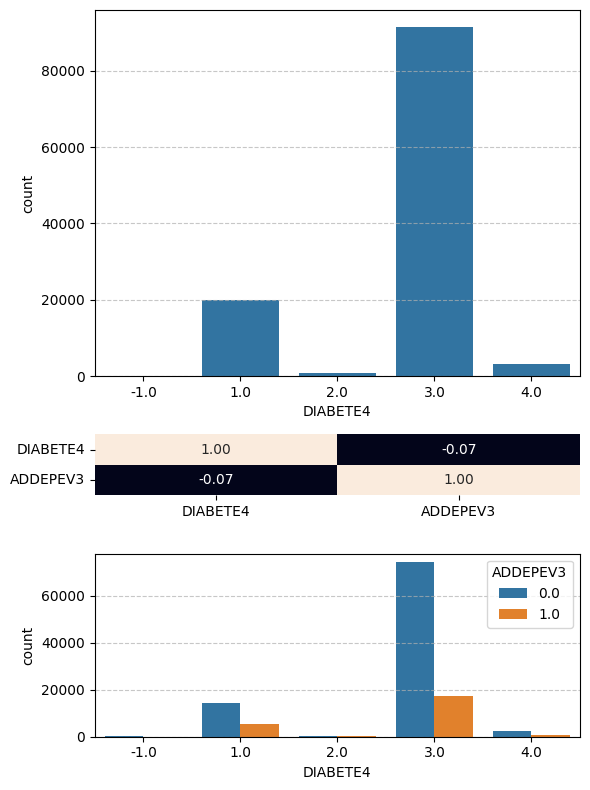

In [36]:
fig, axis = plt.subplots(3, figsize = (6, 8), gridspec_kw={"height_ratios": [6, 1, 3]})

sns.countplot(ax = axis[0], data = df, x = "DIABETE4")
axis[0].grid(axis='y', linestyle='--', alpha=0.7)
# sns.boxplot(ax = axis[1], data = df, x = "DIABETE4")
sns.heatmap(df[["DIABETE4", "ADDEPEV3"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)
sns.countplot(ax = axis[2], data = df, x = "DIABETE4", hue = "ADDEPEV3")
axis[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [37]:
v = cramers_v("DIABETE4", "ADDEPEV3", df)
print(f"Cramér's V: {v:.4f}")

Cramér's V: 0.0808


📌 DIABETE4 – ¿Ha sido diagnosticado con diabetes?
Codificación original utilizada (tras limpieza de nulos):
- 1: Sí
- 2: Sí, pero solo durante el embarazo
- 3: No
- 4: No, pero en el pasado me dijeron que tenía prediabetes o "borderline"
- -1: No contesta (ya eliminado)

🧾 Descripción:
- Esta variable recoge si la persona ha sido diagnosticada con diabetes o prediabetes. Es un indicador clave de salud crónica, que podría relacionarse indirectamente con el bienestar psicológico debido al impacto que tiene en la calidad de vida.

📊 Distribución general (countplot):
- La mayoría de encuestados no tiene diabetes (3).
- Un porcentaje menor sí ha sido diagnosticado (1).
- Otros grupos incluyen prediabetes (4) y diabetes gestacional (2), aunque estos representan una proporción mucho menor.

🧠 Relación con la salud mental (ADDEPEV3):
- El gráfico muestra que las personas diagnosticadas con diabetes (1) y prediabetes (4) tienen una mayor proporción de casos de depresión.
- Esta tendencia es esperable, ya que las enfermedades crónicas pueden aumentar el riesgo de trastornos del estado de ánimo.

📐 Cramér's V: 0.0808
- Correlación débil, pero con suficiente consistencia como para considerarla en modelos explicativos o predictivos.
- Apoya la idea de que la presencia de condiciones crónicas como la diabetes puede contribuir al deterioro de la salud mental.